<a href="https://colab.research.google.com/github/michhottinger/project_x/blob/master/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid data source is from:  
https://github.com/owid/covid-19-data/tree/master/public/data/  
This notebook is to better explore the data from the Covid CSV.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head(40)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.000,37.465,18.733,2.676,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
5,ABW,North America,Aruba,2020-03-23,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
6,ABW,North America,Aruba,2020-03-24,12.0,8.0,1.429,NaN,0.0,0.000,112.395,74.930,13.380,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
7,ABW,North America,Aruba,2020-03-25,17.0,5.0,2.143,NaN,0.0,0.000,159.227,46.831,20.071,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
8,ABW,North America,Aruba,2020-03-26,19.0,2.0,2.429,NaN,0.0,0.000,177.959,18.733,22.747,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
9,ABW,North America,Aruba,2020-03-27,28.0,9.0,3.429,NaN,0.0,0.000,262.256,84.296,32.113,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [2]:
df.shape

(52873, 41)

In [3]:
df.sort_values(by='total_deaths', ascending=False, inplace=True)

In [4]:
df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52570,OWID_WRL,NaN,World,2020-10-27,43598033.0,392993.0,439849.143,1160995.0,5417.0,5917.857,5593.221,50.417,56.429,148.945,0.695,0.759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52569,OWID_WRL,NaN,World,2020-10-26,43205040.0,434925.0,433571.429,1155578.0,4411.0,5811.143,5542.804,55.797,55.623,148.250,0.566,0.746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52568,OWID_WRL,NaN,World,2020-10-25,42770115.0,453764.0,423182.857,1151167.0,5768.0,5745.143,5487.007,58.214,54.290,147.684,0.740,0.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52567,OWID_WRL,NaN,World,2020-10-24,42316351.0,482596.0,411103.571,1145399.0,6322.0,5712.286,5428.793,61.913,52.741,146.944,0.811,0.733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52566,OWID_WRL,NaN,World,2020-10-23,41833755.0,469477.0,398876.714,1139077.0,6360.0,5658.429,5366.881,60.230,51.172,146.133,0.816,0.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52565,OWID_WRL,NaN,World,2020-10-22,41364278.0,450908.0,389300.286,1132717.0,6741.0,5622.857,5306.651,57.847,49.944,145.317,0.865,0.721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52564,OWID_WRL,NaN,World,2020-10-21,40913370.0,394281.0,380362.429,1125976.0,6406.0,5522.286,5248.804,50.583,48.797,144.452,0.822,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52563,OWID_WRL,NaN,World,2020-10-20,40519089.0,349049.0,371276.857,1119570.0,4670.0,5397.143,5198.221,44.780,47.631,143.630,0.599,0.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52562,OWID_WRL,NaN,World,2020-10-19,40170040.0,362205.0,362294.714,1114900.0,3949.0,5292.857,5153.442,46.468,46.479,143.031,0.507,0.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
52561,OWID_WRL,NaN,World,2020-10-18,39807835.0,369209.0,353928.000,1110951.0,5538.0,5295.714,5106.974,47.366,45.406,142.525,0.710,0.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN


In [5]:
dfdate = df[df['date']=='2020-10-06']
dfpop = dfdate[dfdate['population'] > 3000000]
dfpop.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52549,OWID_WRL,NaN,World,2020-10-06,35588957.0,270420.0,300751.429,1042678.0,4453.0,5682.286,4565.731,34.692,38.584,133.766,0.571,0.729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
49457,USA,North America,United States,2020-10-06,7458550.0,40705.0,44358.000,210192.0,398.0,731.714,22533.203,122.975,134.011,635.016,1.202,2.211,123609491.0,1094399.0,373.440,3.306,1038189.0,3.136,23.405,0.043,tests performed,62.50,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
7050,BRA,South America,Brazil,2020-10-06,4927235.0,11946.0,25967.286,146675.0,323.0,659.571,23180.508,56.201,122.165,690.042,1.520,3.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.13,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
22832,IND,Asia,India,2020-10-06,6685082.0,61267.0,77113.000,103569.0,884.0,1035.857,4844.247,44.396,55.879,75.050,0.641,0.751,81071797.0,1089403.0,58.747,0.789,1137394.0,0.824,14.750,0.068,samples tested,73.61,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66,0.640
31750,MEX,North America,Mexico,2020-10-06,808033.0,5247.0,4242.857,79268.0,180.0,380.714,6267.089,40.696,32.908,614.801,1.396,2.953,1787122.0,14192.0,13.861,0.110,10929.0,0.085,2.576,0.388,people tested,73.61,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05,0.774
17645,GBR,Europe,United Kingdom,2020-10-06,515571.0,12593.0,10936.857,42369.0,19.0,52.571,7594.658,185.502,161.106,624.120,0.280,0.774,22409225.0,240116.0,330.101,3.537,240198.0,3.538,21.962,0.046,tests performed,67.59,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32,0.922
24644,ITA,Europe,Italy,2020-10-06,327586.0,2257.0,2317.429,36002.0,16.0,21.571,5418.063,37.329,38.329,595.450,0.265,0.357,11944088.0,99742.0,197.548,1.650,102247.0,1.691,44.121,0.023,tests performed,55.56,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51,0.880
38302,PER,South America,Peru,2020-10-06,829999.0,1830.0,3040.714,32834.0,92.0,72.857,25172.961,55.502,92.222,995.819,2.790,2.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.41,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.800,NaN,NaN,1.600,76.74,0.750
15266,ESP,Europe,Spain,2020-10-06,825410.0,11998.0,9605.429,32486.0,261.0,124.571,17654.023,256.615,205.443,694.817,5.582,2.664,NaN,NaN,NaN,NaN,113745.0,2.433,11.842,0.084,tests performed,60.65,4.675478e+07,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.400,31.400,NaN,2.970,83.56,0.891
16879,FRA,Europe,France,2020-10-06,624274.0,5104.0,11662.143,32299.0,69.0,70.143,9563.971,78.194,178.666,494.826,1.057,1.075,NaN,216497.0,NaN,3.317,166572.0,2.552,14.283,0.070,tests performed,46.76,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.100,35.600,NaN,5.980,82.66,0.901


In [6]:
dfpop.shape

(135, 41)

In [7]:
df_simple = dfdate.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_simple['death_pop'] = df_simple['total_deaths']/df_simple['population']

df_short = df_simple[:-159]
df_short.shape

(53, 7)

# Total deaths  
This shows the total deaths not adjusted for population size. Since lives are lost, and every life matters, the raw number is worth looking at and evaluating here.

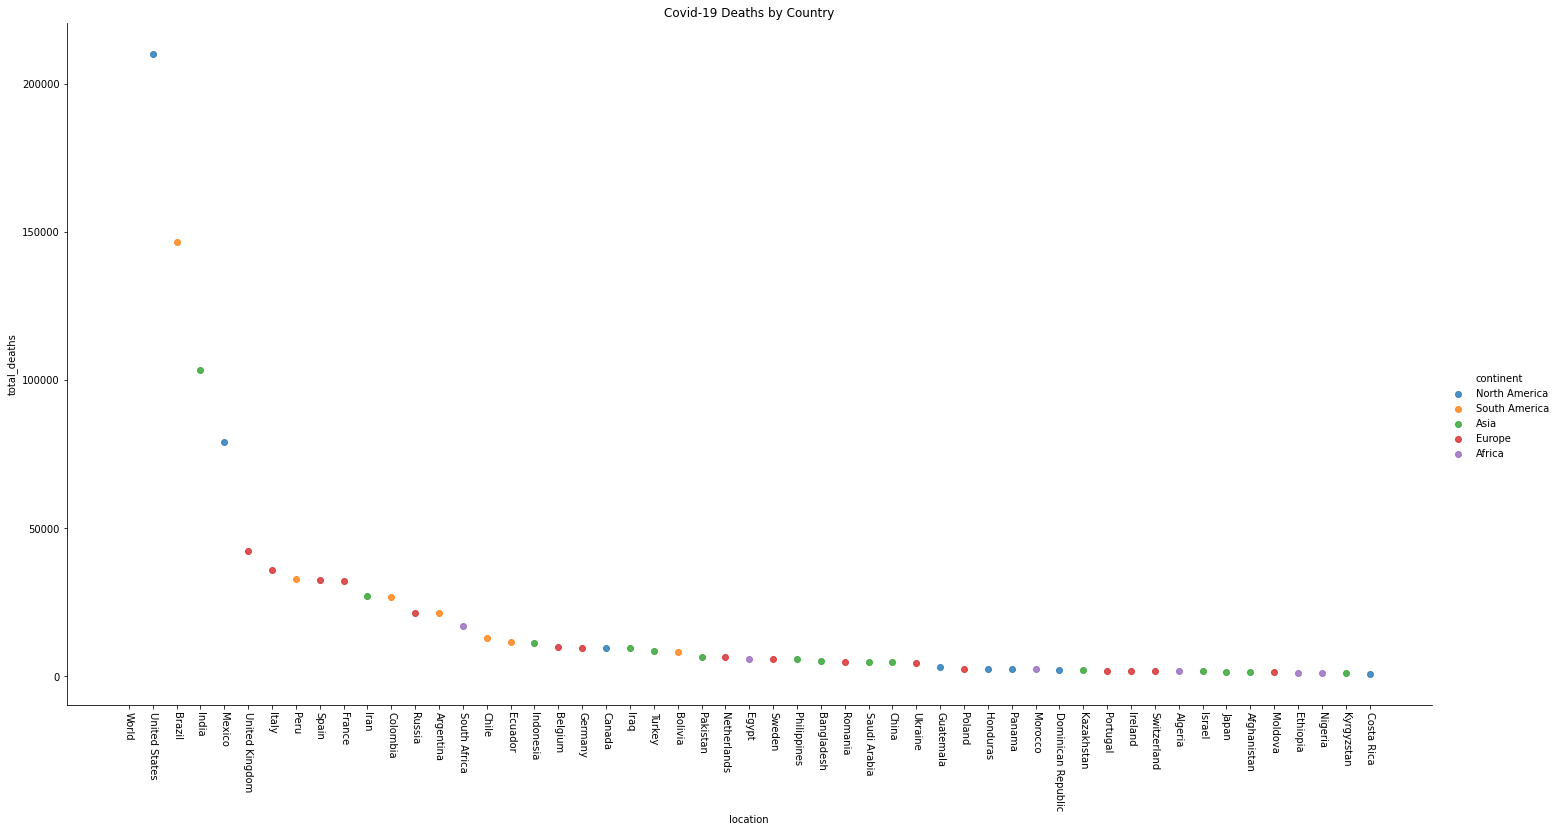

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.lmplot(x='location', y='total_deaths', data=df_short,
           fit_reg=False, # No regression line
           hue='continent', height=10, aspect=20/10)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Total deaths divided by total population  
This gives us a raw visual of the worst 50 countries affected by Covid-19 deaths.

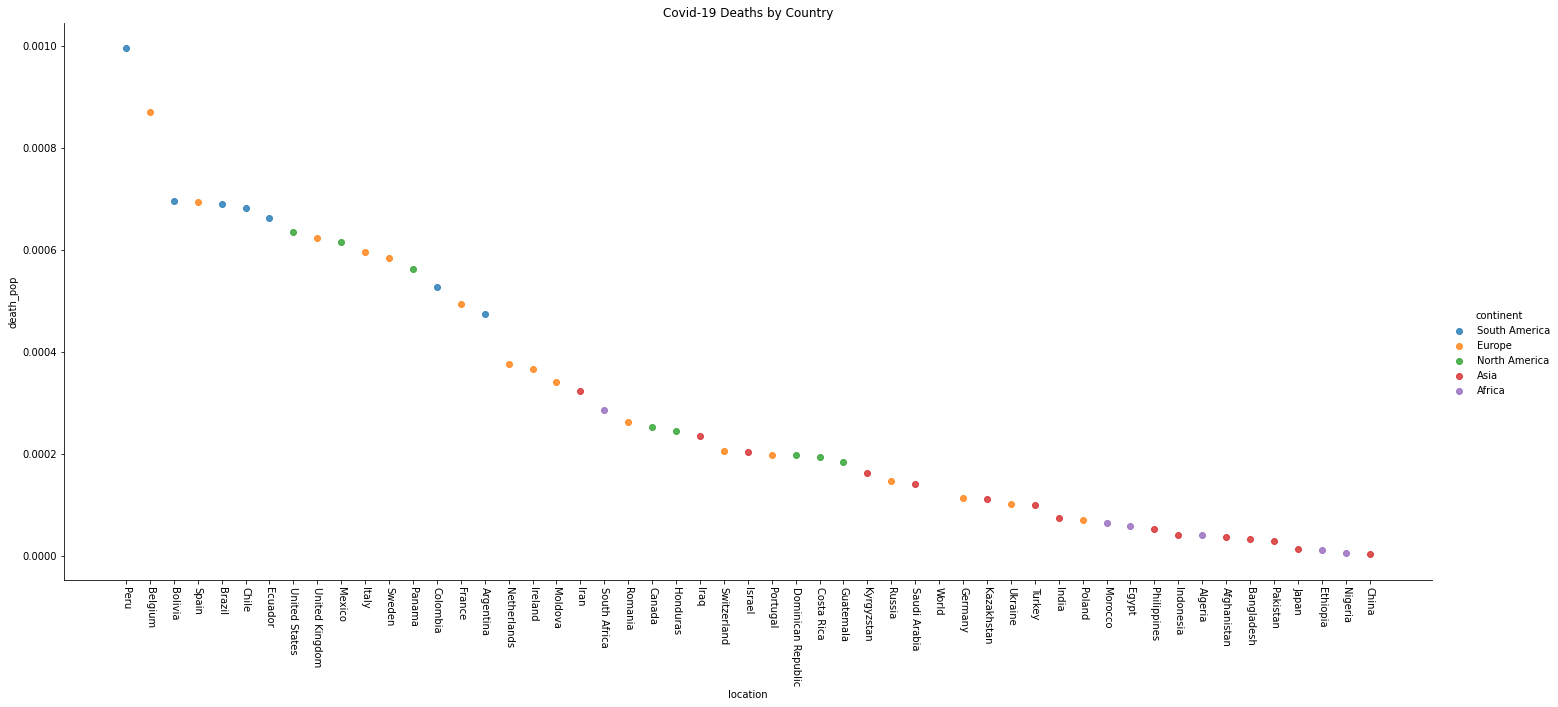

In [9]:
df_ord = df_short.sort_values(by='death_pop', ascending=False)

sns.lmplot(x='location', y='death_pop', data=df_ord,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Filter by pop size over 3 million  
Ordered by total deaths per million  
This enables us to look at the countries that did the worst containment of Covid 19 as well as the best given there population.

<Figure size 2160x1440 with 0 Axes>

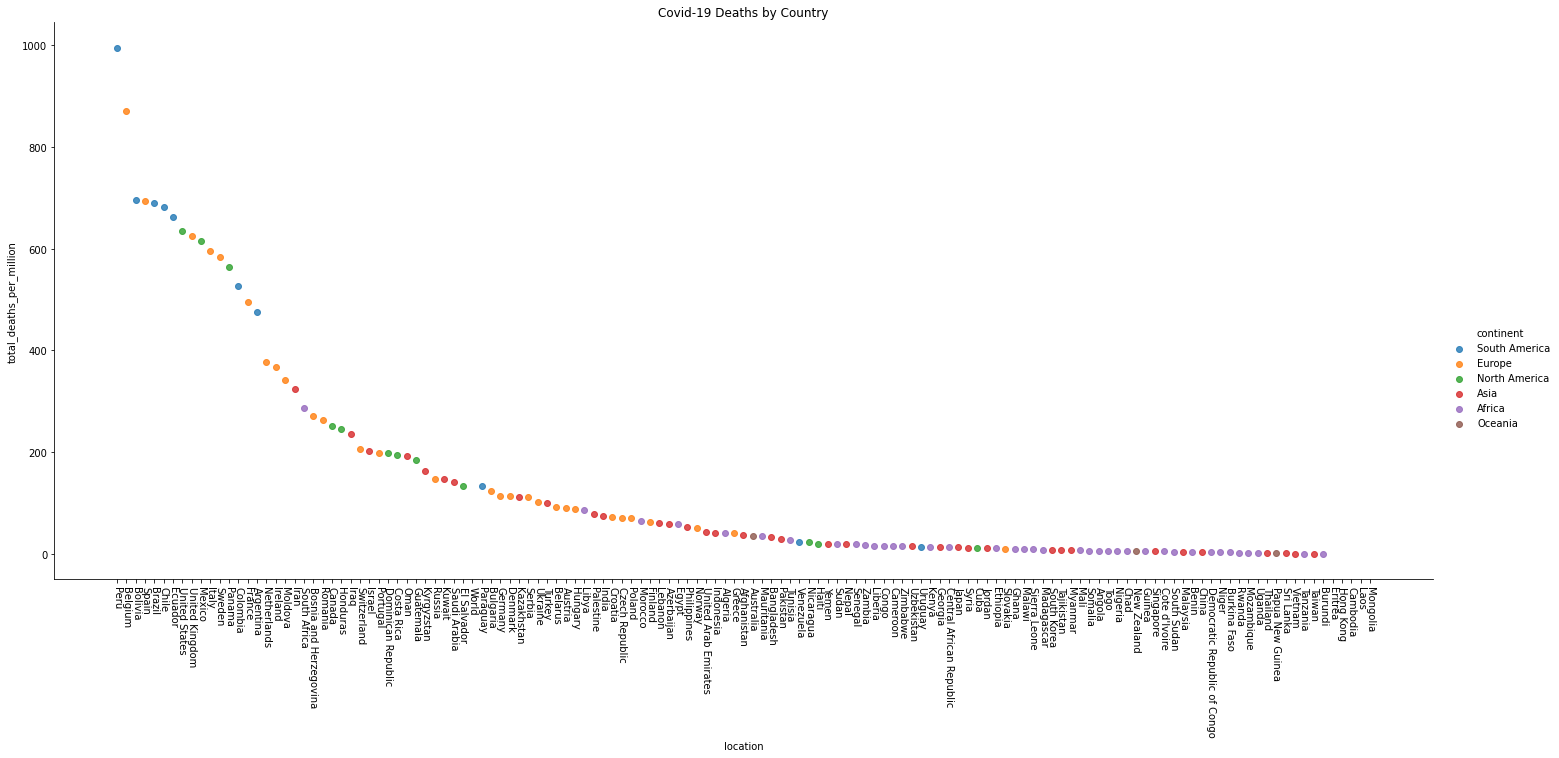

In [10]:

df_pop = dfpop.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_pop['death_pop'] = df_pop['total_deaths']/df_pop['population']

df_pop = df_pop.sort_values(by='total_deaths_per_million', ascending=False)
plt.figure(figsize=(30,20))

sns.lmplot(x='location', y='total_deaths_per_million', data=df_pop,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);